This problem was adapted from Professor Farimani's paper. If you are interested in learning more, you can read it <a href="https://www.nature.com/articles/s41699-018-0060-8.pdf">here</a>.

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import random
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [2]:
# (a)
#x in the shape of (2000,2)
#y in the shape of 2000
# data preprocessing
DNAData = pd.read_csv("data.csv")
DNANames = DNAData.columns.values
DNADataNp = DNAData.to_numpy()
samples, labels = DNADataNp.shape
x1 = []
x2 = []
labellist = []
for label in range(0,labels,2):
    for sample in range(samples): 
        x1.append(DNADataNp[:,label][sample])
        x2.append(DNADataNp[:,label+1][sample])
        labellist.append(DNANames[label+1])
DNADataReshapeT = np.array([x1,x2])
DNADataReshape = np.transpose(DNADataReshapeT)
labelnp = np.transpose(np.array(labellist))
print(DNADataReshape.shape)
print(labelnp.shape)

(2000, 2)
(2000,)


In [3]:
#Splitting data
DNADataReshape.shape
labelnp.shape
X_train, X_test, y_train, y_test = train_test_split(DNADataReshape, labelnp, test_size=0.3, random_state= 24787)

In [4]:
# (b)
# k-means
X_train
X_test
y_train
y_test
clustering = KMeans(n_clusters=20, random_state=24787)
clustering.fit(X_train,y_train)


h = 1  

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\metrics\pairw

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\metrics\pairw

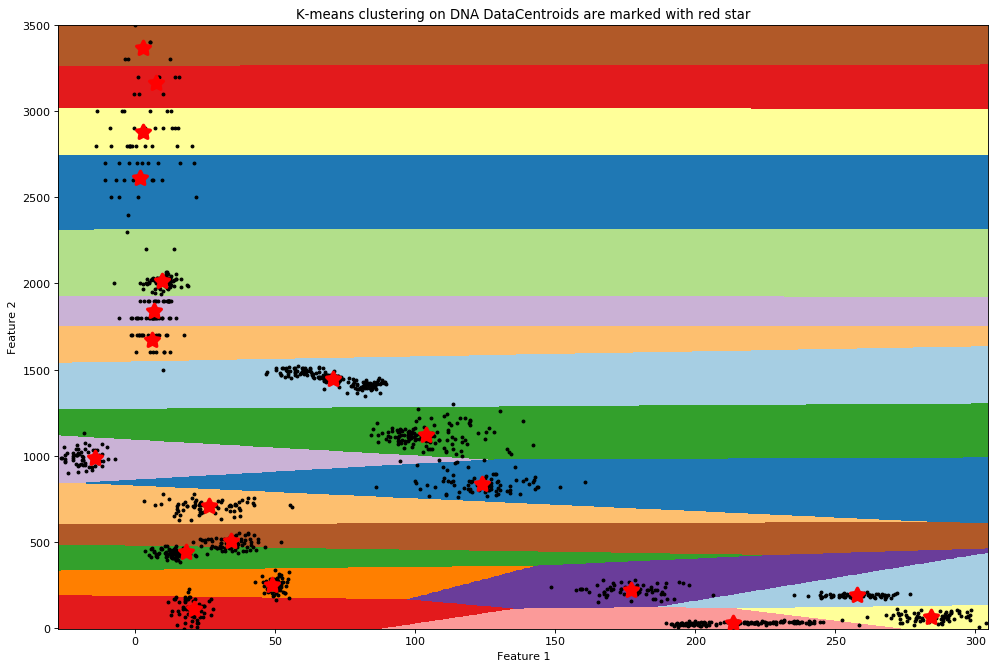

In [5]:
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)
Z = clustering.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(X_train[:, 0], X_train[:, 1], "k.", markersize=5)
centroids = clustering.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker=(5,1),
    s=169,
    linewidths=3,
    color="red",
    zorder=10,
)
plt.title(
    "K-means clustering on DNA Data"
    "Centroids are marked with red star"
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [6]:
OneHot = y_train 
length, = OneHot.shape
OneHotLab = []

for index in range(length):
    #print(OneHot[index])
    if OneHot[index] == "CYS":
        OneHotLab.append(0)
    elif OneHot[index] == "LEU":
        OneHotLab.append(1)
    elif OneHot[index] == "HIS":
        OneHotLab.append(2)
    elif OneHot[index] == "THR":
        OneHotLab.append(3)
    elif OneHot[index] == "GLN":
        OneHotLab.append(4)
    elif OneHot[index] == "MET":
        OneHotLab.append(5)
    elif OneHot[index] == "ARG":
        OneHotLab.append(6)
    elif OneHot[index] == "VAL":
        OneHotLab.append(7)
    elif OneHot[index] == "LYS":
        OneHotLab.append(8)
    elif OneHot[index] == "ALA":
        OneHotLab.append(9)
    elif OneHot[index] == "SER":
        OneHotLab.append(10)
    elif OneHot[index] == "GLU":
        OneHotLab.append(11)
    elif OneHot[index] == "GLY":
        OneHotLab.append(12)
    elif OneHot[index] == "ISO":
        OneHotLab.append(13)
    elif OneHot[index] == "TYR":
        OneHotLab.append(14)
    elif OneHot[index] == "ASN":
        OneHotLab.append(15)
    elif OneHot[index] == "PRO":
        OneHotLab.append(16)
    elif OneHot[index] == "TRP":
        OneHotLab.append(17)
    elif OneHot[index] == "PHE":
        OneHotLab.append(18)
    elif OneHot[index] == "ASP":
        OneHotLab.append(19)
    else:
        OneHotLab.append(20)
        print(OneHot[index])

Y_train = np.array(OneHotLab)

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\metrics\pairw

0
aliceblue
1
violet
2
pink
3
turquoise
4
springgreen
5
peachpuff
6
olive
7
khaki
8
darkgrey
9
red
10
green
11
blue
12
yellow
13
sienna
14
aqua
15
navy
16
moccasin
17
orange
18
ivory
19
magenta


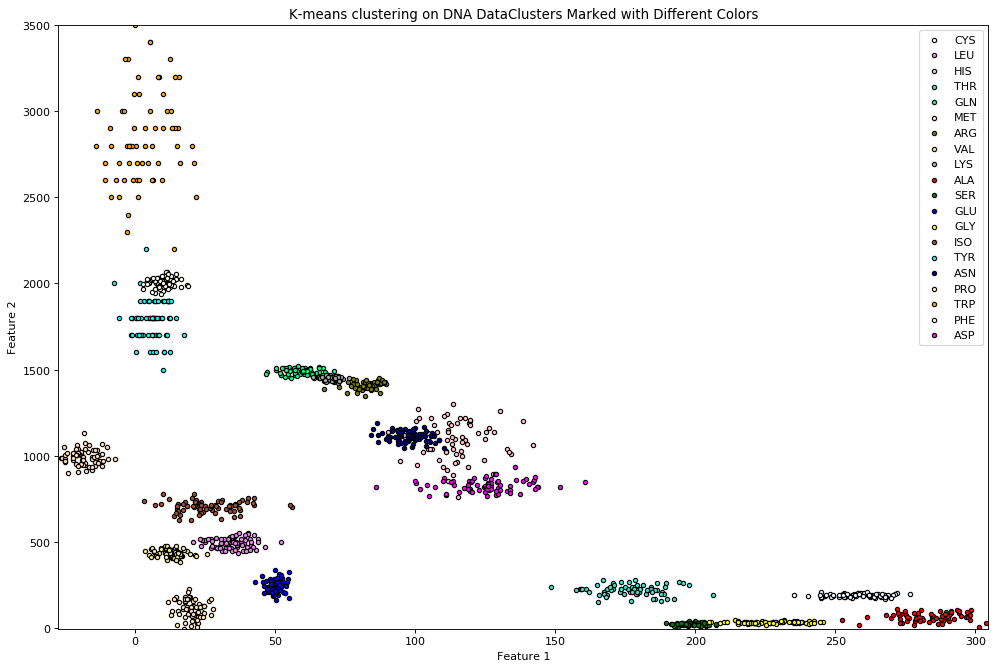

In [7]:
from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)
Z = clustering.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
X = X_train
y = Y_train
n_classes = 20
plot_colors = ["aliceblue","violet","pink","turquoise","springgreen","peachpuff","olive","khaki","darkgrey","red","green","blue","yellow","sienna","aqua","navy","moccasin","orange","ivory","magenta","wheat"]
labelsnp=np.array(["CYS","LEU","HIS","THR","GLN","MET","ARG","VAL","LYS","ALA","SER","GLU","GLY","ISO","TYR","ASN","PRO","TRP","PHE","ASP"])
for i, color in zip(range(n_classes), plot_colors):
    print(i)
    print(color)
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=labelsnp[i],
        edgecolor="black",
        s=15,
    )

plt.title(
    "K-means clustering on DNA Data"
    "Clusters Marked with Different Colors"
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.show()

In [8]:
# (c)
# random forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curr

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0
0.9483333333333334
1
0.9516666666666667
2
0.9783333333333334
3
0.9816666666666667
4
0.9783333333333334
5
0.9783333333333334
6
0.9766666666666667
7
0.9733333333333334
8
0.98
9
0.9783333333333334
10
0.985
11
0.9816666666666667
12


C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curr

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

0.9766666666666667
13
0.9816666666666667
14
0.9783333333333334
15
0.9783333333333334
16
0.9783333333333334
17
0.9766666666666667
18


C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

0.9783333333333334
19
0.9783333333333334
20
0.98
21
0.98
22
0.975
23
0.9816666666666667


C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

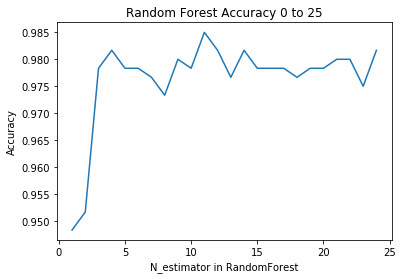

In [9]:
#Random Forest iteration
Est_num = 24
scorelist = []
N_estimator_list = []
for Num_est in range(Est_num):
    print(Num_est)
    tree = RandomForestClassifier(n_estimators=(Num_est+1))
    tree.fit(X_train, y_train)
    score = tree.score(X_test, y_test)
    scorelist.append(score)
    N_estimator_list.append(Num_est+1)
    print(score)
N_estimator = np.array(N_estimator_list)
score = np.array(scorelist)

plt.plot(N_estimator, score)
plt.xlabel("N_estimator in RandomForest")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy 0 to 25")
plt.show()

In [10]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
print(clf.score(X_train,y_train))
score = clf.score(X_test, y_test)
print(score)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curr

1.0
0.9783333333333334


C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [11]:
print(clf.score(X_train,y_train))
print(score)

1.0
0.9783333333333334


C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [12]:
OneHot = y_train 
length, = OneHot.shape
OneHotLab = []

for index in range(length):
    #print(OneHot[index])
    if OneHot[index] == "CYS":
        OneHotLab.append(0)
    elif OneHot[index] == "LEU":
        OneHotLab.append(1)
    elif OneHot[index] == "HIS":
        OneHotLab.append(2)
    elif OneHot[index] == "THR":
        OneHotLab.append(3)
    elif OneHot[index] == "GLN":
        OneHotLab.append(4)
    elif OneHot[index] == "MET":
        OneHotLab.append(5)
    elif OneHot[index] == "ARG":
        OneHotLab.append(6)
    elif OneHot[index] == "VAL":
        OneHotLab.append(7)
    elif OneHot[index] == "LYS":
        OneHotLab.append(8)
    elif OneHot[index] == "ALA":
        OneHotLab.append(9)
    elif OneHot[index] == "SER":
        OneHotLab.append(10)
    elif OneHot[index] == "GLU":
        OneHotLab.append(11)
    elif OneHot[index] == "GLY":
        OneHotLab.append(12)
    elif OneHot[index] == "ISO":
        OneHotLab.append(13)
    elif OneHot[index] == "TYR":
        OneHotLab.append(14)
    elif OneHot[index] == "ASN":
        OneHotLab.append(15)
    elif OneHot[index] == "PRO":
        OneHotLab.append(16)
    elif OneHot[index] == "TRP":
        OneHotLab.append(17)
    elif OneHot[index] == "PHE":
        OneHotLab.append(18)
    elif OneHot[index] == "ASP":
        OneHotLab.append(19)
    else:
        OneHotLab.append(20)
        print(OneHot[index])

Y_train = np.array(OneHotLab)

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import numpy as np
import matplotlib.colors as mcolors

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


n_classes = 20
plot_colors = ["aliceblue","violet","pink","turquoise","springgreen","peachpuff","olive","khaki","darkgrey","red","green","blue","yellow","sienna","aqua","navy","moccasin","orange","ivory","magenta","wheat"]
plot_step = 1

X = X_train
y = Y_train

# Train
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curr

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\rdesa\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the 

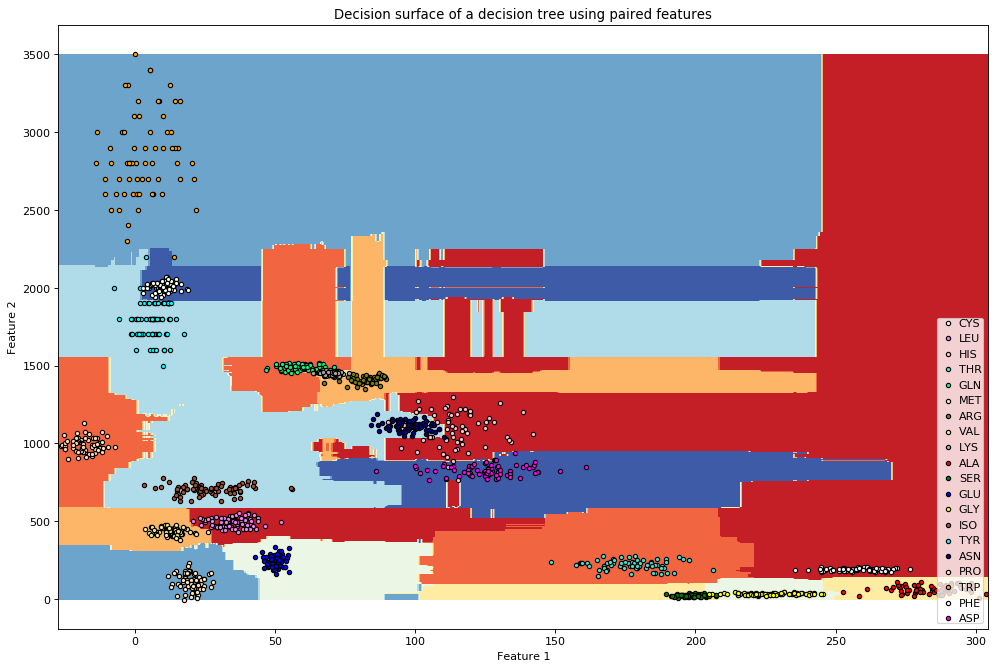

In [15]:
figure(figsize=(15, 10), dpi=80)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
labelsnp = np.array(["CYS","LEU","HIS","THR","GLN","MET","ARG","VAL","LYS","ALA","SER","GLU","GLY","ISO","TYR","ASN","PRO","TRP","PHE","ASP"]) 
# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    #print(i)
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=labelsnp[i],
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )
plt.title("Decision surface of a decision tree using paired features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.show()

In [16]:
# (d)
# Analysis
#The K means algorithm produces long straight lines for
#decision boundaries that are nearly perpendicular to the 
#to a line made between two centroids. This makes sense
#as the decision boundary is seperating the groups based
# on the centroids of the custer 
#K means also produces smoother decision boundaries
#The K random forest can only produce straight line 
#decision boundaries parallel to the axes
#The accuracy of the k random forest is high even for the 
#test data being = to 97%